In [1]:
%load_ext autoreload 
%autoreload 2

from imports import *
import queue_system as qs
from queue_system import *

seed = random.seed(10)
seed_np = np.random.seed(10)

## Import values

In [2]:
with open('values/V_agg.pkl', "rb") as fp: 
    V_agg = pickle.load(fp)
with open('values/V_star.pkl', "rb") as fp: 
    V_star = pickle.load(fp)
with open('values/V_opt.pkl', "rb") as fp: 
    V_opt = pickle.load(fp)
with open('values/V_exp.pkl', "rb") as fp: 
    V_exp = pickle.load(fp)

## Import weights

In [56]:
6 % 12

6

In [64]:
weights_OGD = []
weights_polpot = []
weights_expw_variable_eta = []
weights_expw, weights_expw_NN1 = [], []


repeat_weights = 10

for n in range(repeat_weights):
        
    with open('weights/weights_expw_' + str(n) + '.pkl', "rb") as fp: 
        weights_expw.append(pickle.load(fp))
    with open('weights/weights_expw_NN_1_' + str(n) + '.pkl', "rb") as fp: 
        weights_expw_NN1.append(pickle.load(fp))
        
    # with open('weights/weights_polpot_' + str(n) + '.pkl', "rb") as fp:
    #     weights_polpot.append(pickle.load(fp))
    # with open('weights/weights_expw_variable_eta_' + str(n) + '.pkl', "rb") as fp:
    #     weights_expw_variable_eta.append(pickle.load(fp))        
    #with open('weights_final/weights_OGD' + str(n) + '.pkl', "rb") as fp:
    #    weights_OGD.append(pickle.load(fp)) 

In [65]:
%%time

rewards_agg_b_expw = []
rewards_agg_b_expw_NN1 = []
rewards_agg_b_OGD = []
rewards_agg_b_polpot = []
rewards_agg_b_variable_eta = []

for n in tqdm(range(repeat_weights)):
    
    
    rewards_agg_b_expw.append([])
    rewards_agg_b_expw_NN1.append([])
    rewards_agg_b_OGD.append([])
    rewards_agg_b_polpot.append([])
    rewards_agg_b_variable_eta.append([])
    

        
    # for updates, weights in weights_expw[n].items():
    #     P_agg, r_agg = compute_transitions_and_rewards_avg(weights)
    #     V_agg = compute_value_bellman(P_agg, r_agg)
    #     V_agg_pi0 = 0
    #     for i in range(len(verteces)):
    #         state = np.zeros(len(verteces))
    #         state[i] += 1
    #         ind = str(val_list.index(tuple(state)))
    #         V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
    #     rewards_agg_b_expw[-1].append(V_agg_pi0)
        
        
    # for updates, weights in weights_expw_NN[n].items():
    #     P_agg, r_agg = compute_transitions_and_rewards_avg(weights)
    #     V_agg = compute_value_bellman(P_agg, r_agg)
    #     V_agg_pi0 = 0
    #     for i in range(len(verteces)):
    #         state = np.zeros(len(verteces))
    #         state[i] += 1
    #         ind = str(val_list.index(tuple(state)))
    #         V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
    #     rewards_agg_b_expw_NN[-1].append(V_agg_pi0)
        
    for updates, weights in weights_expw_NN1[n].items():
        P_agg, r_agg = compute_transitions_and_rewards_avg(weights)
        V_agg = compute_value_bellman(P_agg, r_agg)
        V_agg_pi0 = 0
        for i in range(len(verteces)):
            state = np.zeros(len(verteces))
            state[i] += 1
            ind = str(val_list.index(tuple(state)))
            V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
        rewards_agg_b_expw_NN1[-1].append(V_agg_pi0)
        
#     for updates, weights in tqdm(weights_polpot[n].items()):
#         P_agg, r_agg = compute_transitions_and_rewards_avg(weights)
#         V_agg = compute_value_bellman(P_agg, r_agg)
#         V_agg_pi0 = 0
#         for i in range(len(verteces)):
#             state = np.zeros(len(verteces))
#             state[i] += 1
#             ind = str(val_list.index(tuple(state)))
#             V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
#         rewards_agg_b_polpot[-1].append(V_agg_pi0)

    #for updates, weights in weights_OGD[n].items():
    #    P_agg, r_agg = compute_transitions_and_rewards_avg(weights)
    #    V_agg = compute_value_bellman(P_agg, r_agg)
    #    V_agg_pi0 = 0
    #    for i in range(len(verteces)):
    #        state = np.zeros(len(verteces))
    #        state[i] += 1
    #        ind = str(val_list.index(tuple(state)))
    #        V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
    #    rewards_agg_b_OGD[-1].append(V_agg_pi0)
    
#     for updates, weights in tqdm(weights_expw_variable_eta[n].items()):
#         P_agg, r_agg = compute_transitions_and_rewards_avg(weights)
#         V_agg = compute_value_bellman(P_agg, r_agg)
#         V_agg_pi0 = 0
#         for i in range(len(verteces)):
#             state = np.zeros(len(verteces))
#             state[i] += 1
#             ind = str(val_list.index(tuple(state)))
#             V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
#         rewards_agg_b_variable_eta[-1].append(V_agg_pi0)
        

100%|███████████████████████████████████████████| 10/10 [03:51<00:00, 23.16s/it]

CPU times: user 7min 50s, sys: 6min 31s, total: 14min 21s
Wall time: 3min 51s


In [66]:
# mean
# rewards_expw_mean = np.mean(rewards_agg_b_expw, axis=0)
# rewards_expw_NN_mean = np.mean(rewards_agg_b_expw_NN, axis=0)
rewards_expw_NN1_mean = np.mean(rewards_agg_b_expw_NN1, axis=0)
rewards_OGD_mean = np.mean(rewards_agg_b_OGD, axis=0)
rewards_polpot_mean = np.mean(rewards_agg_b_polpot, axis=0)
rewards_variable_eta_mean = np.mean(rewards_agg_b_variable_eta, axis=0)


# std
# rewards_expw_std = np.std(rewards_agg_b_expw, axis=0)
# rewards_expw_NN_std = np.std(rewards_agg_b_expw_NN, axis=0)
rewards_expw_NN1_std = np.std(rewards_agg_b_expw_NN1, axis=0)
rewards_OGD_std = np.std(rewards_agg_b_OGD, axis=0)
rewards_polpot_std = np.std(rewards_agg_b_polpot, axis=0)
rewards_variable_eta_std = np.std(rewards_agg_b_variable_eta, axis=0)

# Final Plot

## average over $\pi_0$

In [67]:
V_star_pi0 = 0
for i in range(len(verteces)):
    state = np.zeros(len(verteces))
    state[i] += 1
    ind = str(val_list.index(tuple(state)))
    V_star_pi0 += prob_arrival[i] * V_star[int(ind)]
    #print(state_space_ind[ind])
    
V_opt_pi0 = 0
for i in range(len(verteces)):
    state = np.zeros(len(verteces))
    state[i] += 1
    ind = str(val_list.index(tuple(state)))
    V_opt_pi0 += prob_arrival[i] * V_opt[int(ind)]
    #print(state_space_ind[ind])

In [68]:
V_exp_pi0 = {str(exp) : 0 for exp in experts}
for v, exp in zip(V_exp, experts):
    for i in range(len(verteces)):
        state = np.zeros(len(verteces))
        state[i] += 1
        ind = str(val_list.index(tuple(state)))
        V_exp_pi0[str(exp)] += prob_arrival[i] * v[int(ind)]
        #print(state_space_ind[ind])

## Plot

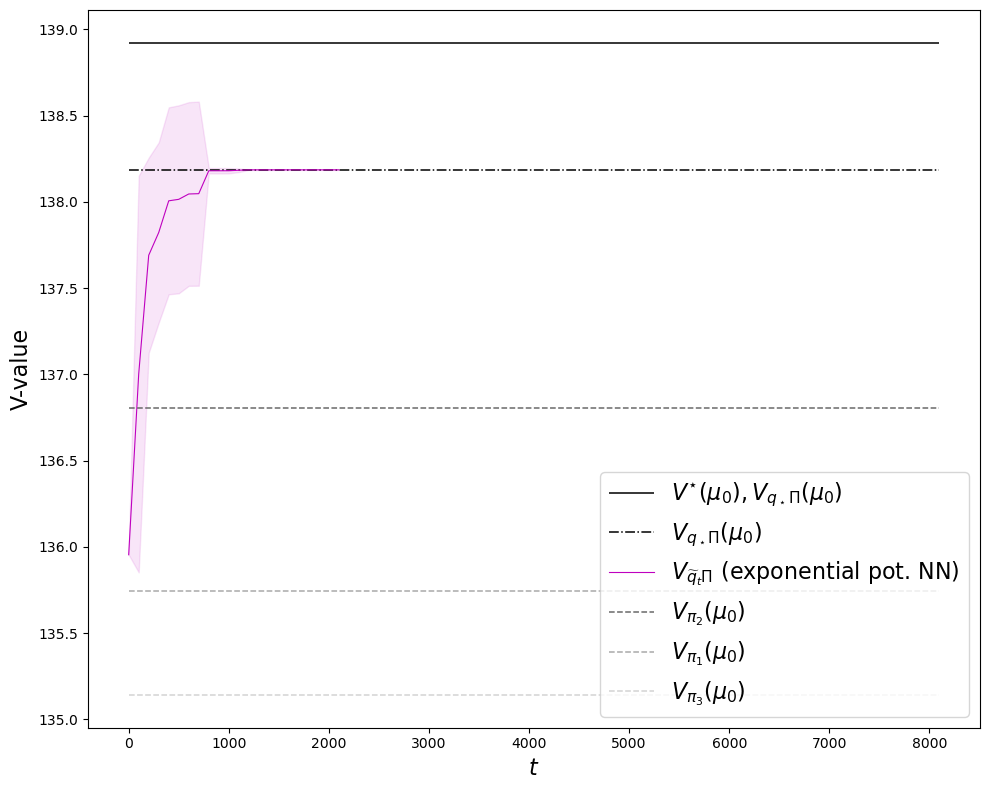

In [69]:
values_list = []

updates_x = np.array(range(82)) * 100 #* 5000
updates_NN = np.array(range(22)) * 100 

figure(figsize=(10, 8))


plt.hlines(V_star_pi0, 0, updates_x[-1], 'black',  linewidth=1.1, label = '$V^{\star}(\mu_0), V_{q_\star\Pi}(\mu_0)$')
plt.hlines(V_opt_pi0, 0, updates_x[-1], 'black', ls ='dashdot',  linewidth=1.1, label = '$V_{q_\star\Pi}(\mu_0)$')


# ci_polpot = 2 * rewards_polpot_std #/ np.sqrt(10) 
# plt.plot(updates_x, rewards_polpot_mean, 'C2', linewidth=.8, label='$V_{\widetilde{q}_t\Pi}(\mu_0)$ (polynomial pot.)')
# plt.fill_between(updates_x, (rewards_polpot_mean-ci_polpot), (rewards_polpot_mean+ci_polpot), color='C2', alpha=.1)

# ci_exp_var = 2 * rewards_variable_eta_std 
# plt.plot(updates_x, rewards_variable_eta_mean , 'C3',linewidth=.8,  label='$V_{\widetilde{q}_t\Pi}$ (exponential pot. $\eta_t$)')
# plt.fill_between(updates_x, (rewards_variable_eta_mean -ci_exp_var), (rewards_variable_eta_mean  +ci_exp_var), color='C3', alpha=.1)

#ci_OGD = 2 * rewards_OGD_std 
#plt.plot(updates_x[:68], rewards_OGD_mean , 'C4',linewidth=.8,  label='$V_{\widetilde{q}_t\Pi}$ (greedy projection)')
#plt.fill_between(updates_x[:68], (rewards_OGD_mean -ci_OGD), (rewards_OGD_mean + ci_OGD), color='C4', alpha=.1)

# ci_expw = 2 * rewards_expw_std 
# plt.plot(updates_x, rewards_expw_mean, 'b',linewidth=.8,  label='$V_{\widetilde{q}_t\Pi}$ (exponential pot. $\eta$ fixed)')
# plt.fill_between(updates_x, (rewards_expw_mean -ci_expw), (rewards_expw_mean +ci_expw), color='b', alpha=.1)

# ci_expw_NN = 2 * rewards_expw_NN_std
# plt.plot(updates_NN, rewards_expw_NN_mean, 'm',linewidth=.8,  label='$V_{\widetilde{q}_t\Pi}$ (exponential pot. NN)')
# plt.fill_between(updates_NN, (rewards_expw_NN_mean -ci_expw_NN), (rewards_expw_NN_mean +ci_expw_NN), color='m', alpha=.1)

# for i, rewards in enumerate(rewards_agg_b_expw_NN):
#     if i == 0:
#         plt.plot(updates_NN, rewards, 'red', linewidth=.8, label='NN traj.')
#     else:
#         plt.plot(updates_NN, rewards, 'red', linewidth=.8)
    

ci_expw_NN1 = 2 * rewards_expw_NN1_std
plt.plot(updates_NN, rewards_expw_NN1_mean, 'm',linewidth=.8,  label='$V_{\widetilde{q}_t\Pi}$ (exponential pot. NN)')
plt.fill_between(updates_NN, (rewards_expw_NN1_mean -ci_expw_NN1), (rewards_expw_NN1_mean +ci_expw_NN1), color='m', alpha=.1)

# for i, rewards in enumerate(rewards_agg_b_expw_NN1):
#     if i == 0:
#         plt.plot(updates_NN, rewards, 'red', linewidth=.8, label='NN traj.')
#     else:
#         plt.plot(updates_NN, rewards, 'red', linewidth=.8)
        
c = ['dimgrey', 'darkgrey', 'lightgrey', 'grey', 'darkgrey']
count = 0
    
V_exp_sorted = sorted(V_exp_pi0.items(), key=lambda x:x[1], reverse= True)

for item in V_exp_sorted:
    plt.hlines(item[1], 0, updates_x[-1], c[count], linestyle='dashed', linewidth=1.1, label = '$V_{\pi_' + str(exp_ind[item[0]] +1 ) + '}(\mu_0)$')
    count += 1

plt.xlabel('$t$', fontsize=16)
plt.ylabel('V-value', fontsize=16)
# plt.xlim((0, 200))
# plt.ylim((1.08, 1.09))
#plt.title('Values comparison')
plt.legend(loc='lower right', fontsize=16)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('figures/policies_performance5.pdf')